<div style="display: flex;">
    <h1>Machine Learning on Covid dataset</h1>
    <img src="covid.jpeg" heigh="100px" width="250px"/>
</div>

<div style="border: 1px dashed black;
            padding: 10px 10px 10px 10px;">
    <h4>Machine Learning general workflow :</h4>
    <ol>
        <li><a href='#part1'>Defining a quantitative objective</a></li>
        <li><a href='#part2'>EDA (Exploratory Data Analysis):</a> Understanding as much as possible the data in order to define modelling startegy.
        <ul>
            <li><a href='#part2.1'><span style="color: blue;">Number of rows and columns</span></a></li>
            <li><a href='#part2.2'><span style="color: blue;">Identifying the target</span></a></li>
            <li><a href='#part2.3'><span style="color: blue;">Variables types</span></a></li>
            <li><a href='#part2.4'><span style="color: blue;">Identification of missing values</span></a></li>
            <li><a href='#part2.5'><span style="color: red;">Visualizing the target</span></a></li>
            <li><a href='#part2.6'><span style="color: red;">Understanding all the variables</span></a></li>
            <li><a href='#part2.7'><span style="color: red;">Visualizing relationships between the target and the features</span></li>
            <li><a href='#part2.8'><span style="color: red;">Identifying outliers</span></a></li>
        </ul></li>
        <li><a href='#part3'>Pre-Processing: </a>Transforming the data in order to have a proper input for modelling.
        <ul>
            <li>Splitting data into Train set and Test set</li>
            <li>Removing/Replacing NA</li>
            <li>Encoding variables</li>
            <li>Removing outliers which drop down model performances</li>
            <li>Feature selection</li>
            <li>Feature engineering</li>
            <li>Feature scaling</li>
        </ul></li>
        <li><a href='#part4'>Modelling: </a> Giving answer to the former objective.
        <ul>
            <li>Defining a scoring function</li>
            <li>Training of the differents models</li>
            <li>Optimization with GridSearchCV</li>
            <li>(Optional) Analysis of errors and go back to EDA/Pre processing</li>
            <li>Learning curve and decision</li>
        </ul></li>
    </ol>
    <p>(<span style="color: blue;">*="front-end" part</span>, <br/>
        <span style="color: red;">*="back-end" part</span>)</p>
          <a href='https://scikit-learn.org/stable/index.html#' target='_blank'>See Scikit-Learn documentation</a>
        <br/>
        <a href='https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html' target='_blank'>See Scikit-Learn scheme for choosing the right model</a>
        <br/>
        <a href='https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/', target='_blank'>See external ressouces about classification metrics</a>
    </p>
</div>

Data can be found at https://www.kaggle.com/einsteindata4u/covid19.</br>

<h3>0) Preliminary remarks</h3>

<ul>
    <li>Clinical data have been already standardized (mean set to 0 and standard deviation to 1)</li>
</ul>

<a id='part1'><h3 style='border-top: 3px solid black;
           padding-top: 20px;'>1) Objectives</h3></a>

<strong>Predict confirmed COVID-19 cases among suspected cases with a Sensitivity of 75%.</strong>
</br>Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?
</br>We have chosen the <strong>Sensitivity metric</strong> because of the class disequelibrium and the fact that we want to penalize False Negative more than False Positive.

<a id='part2'><h3 style='border-top: 3px solid black;
           padding-top: 20px;'>2) EDA</h3></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

<a id='part2.1'><p style='text-decoration: underline;'>Number of rows and columns :</p></a>

In [2]:
covid = pd.read_excel('/media/anthony/USOPP/Kaggle/covid_dataset.xlsx')
print('{} rows x {} columns'.format(covid.shape[0], covid.shape[1]))
covid.columns = [i.replace(' (1=yes, 0=no)', '').\
                 replace(' ', '_').\
                 replace('-', '_') for i in covid.columns]
pd.set_option('display.max_rows', covid.shape[1])
covid.head(n=10)

5644 rows x 111 columns


,Patient_ID,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,...,Hb_saturation_(arterial_blood_gases),pCO2_(arterial_blood_gas_analysis),Base_excess_(arterial_blood_gas_analysis),pH_(arterial_blood_gas_analysis),Total_CO2_(arterial_blood_gas_analysis),HCO3_(arterial_blood_gas_analysis),pO2_(arterial_blood_gas_analysis),Arteiral_Fio2,Phosphor,ctO2_(arterial_blood_gas_analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='part2.2'><p style='text-decoration: underline;
          border-top: 1px solid black;
          padding-top: 15px;'>Identification of the target :</p></a>
The target is the column called <strong>'SARS_Cov_2_exam_result'</strong>

<a id='part2.3'><p style='text-decoration: underline;
          border-top: 1px solid black;
          padding-top: 15px;'>Variables types:</p></a>

Text(0.5, 1.0, 'Pie-chart of the different data type in covid dataset')

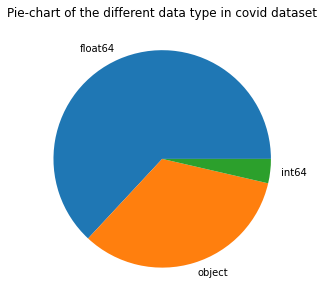

In [3]:
figure = plt.figure(figsize=(5, 5))
ax = figure.add_subplot(1, 1, 1)
ax.pie(x=covid.dtypes.value_counts(),
       labels=['float64', 'object', 'int64'])
ax.set_title('Pie-chart of the different data type in covid dataset')

<a id='part2.4'><p style='text-decoration: underline;
          border-top: 1px solid black;
          padding-top: 15px;'>Identification of missing values</p></a>

Proportion of missing values :

In [4]:
print('{} missing values versus {} total values'.format(np.abs(covid.count()-covid.shape[0]).cumsum().max(),
                                                        covid.shape[0]*covid.shape[1]))
print('{:.2f}% of missing values'.format((np.abs(covid.count()-covid.shape[0]).cumsum().max())*100/(covid.shape[0]*covid.shape[1])))

551682 missing values versus 626484 total values
88.06% of missing values


There is a lot of missing data as explained in the dataset description on Kaggle : "Decision making by health care professionals is a complex process, when physicians see a patient for the first time with an acute complaint (e.g., recent onset of fever and respiratory symptoms) they will take a medical history, perform a physical examination, and will base their decisions on this information. To order or not laboratory tests, and which ones to order, is among these decisions, and there is no standard set of tests that are ordered to every individual or to a specific condition."</br>

Location of missing values :

<AxesSubplot:>

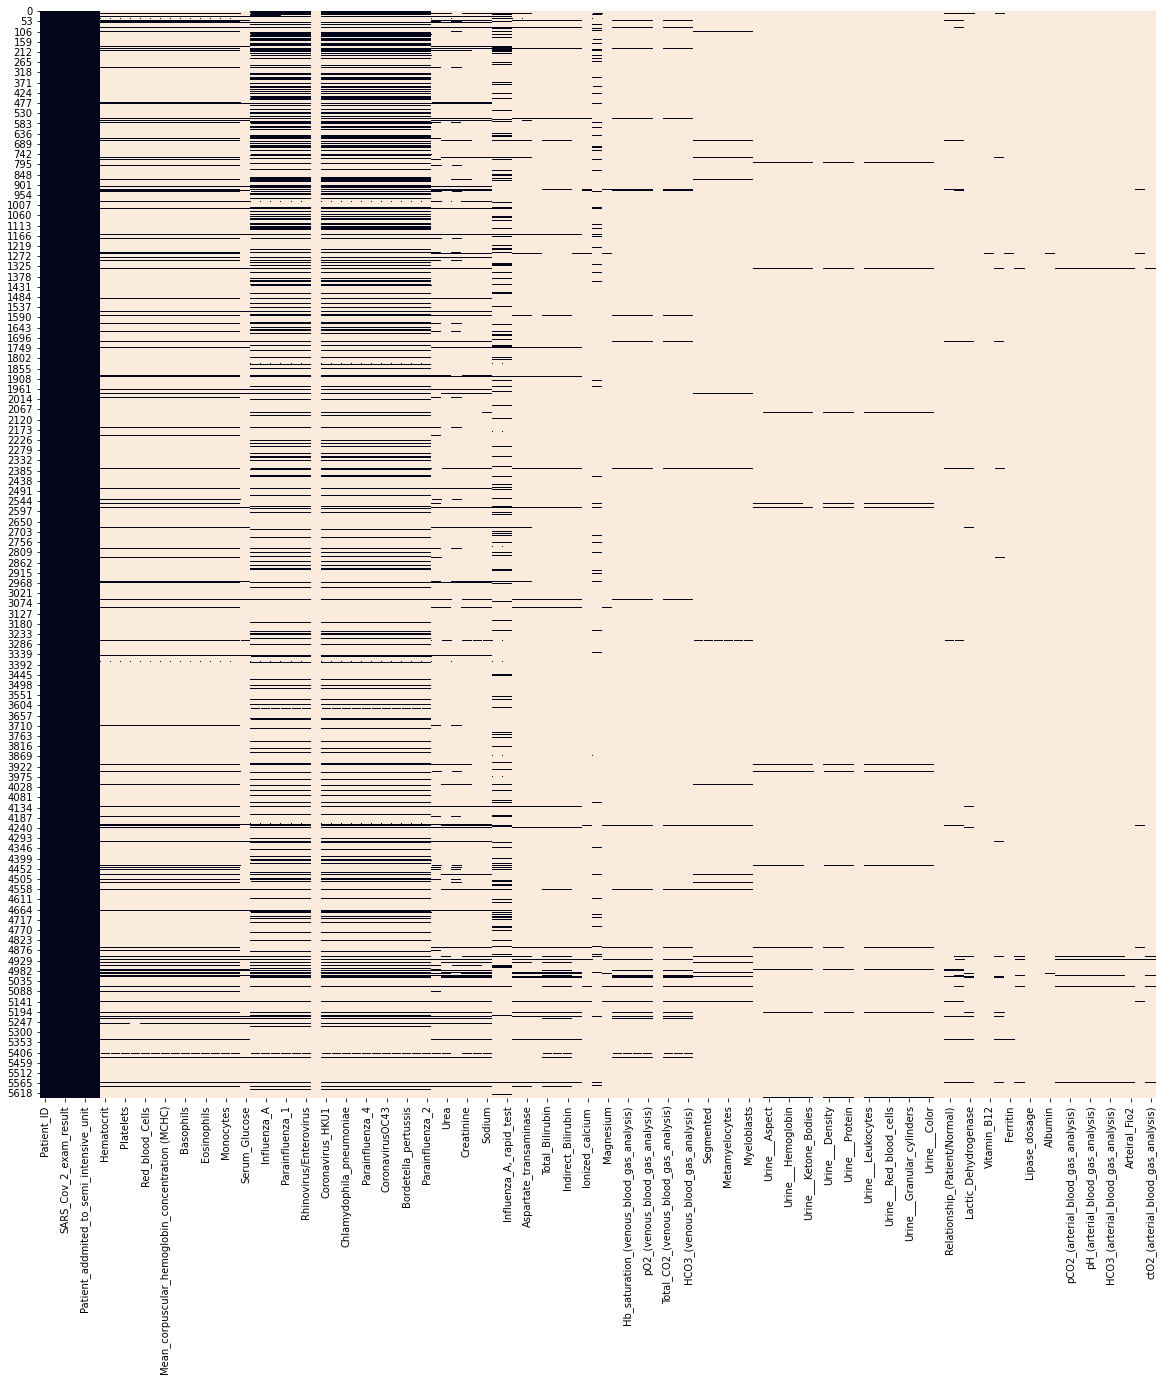

In [5]:
figure = plt.figure(figsize=(20, 20))
ax = figure.add_subplot(1, 1, 1)
sns.heatmap(data=covid.isnull(), cbar=False)

<strong>Most of the missing data are about laboratory tests.</strong>
<ul>
    <li>Black point = Value</li>
    <li>Blank = NaN</li>
    <li>Long black line = Maybe correlated variables</li>
</ul>

In [6]:
df_missing_data_percent = (covid.isna().sum(axis=0)/covid.shape[0]).sort_values(ascending=True)
df_missing_data_percent
#See Series object below (click on '...')

Patient_ID                                          0.000000
Patient_age_quantile                                0.000000
SARS_Cov_2_exam_result                              0.000000
Patient_addmited_to_regular_ward                    0.000000
Patient_addmited_to_semi_intensive_unit             0.000000
Patient_addmited_to_intensive_care_unit             0.000000
Influenza_B                                         0.760099
Respiratory_Syncytial_Virus                         0.760099
Influenza_A                                         0.760099
Rhinovirus/Enterovirus                              0.760454
Inf_A_H1N1_2009                                     0.760454
CoronavirusOC43                                     0.760454
Coronavirus229E                                     0.760454
Parainfluenza_4                                     0.760454
Adenovirus                                          0.760454
Chlamydophila_pneumoniae                            0.760454
Parainfluenza_3         

Text(0.5, 0, '% of missing data')

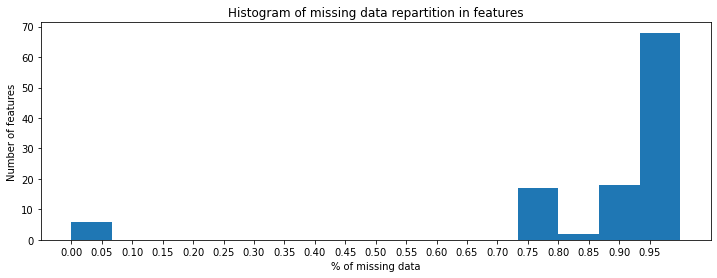

In [8]:
figure = plt.figure(figsize=(12, 4))
ax = figure.add_subplot(1, 1, 1)
ax.hist(df_missing_data_percent, bins=15)
ax.set_xticks(np.arange(0.0, 1.0, 0.05))
ax.set_title('Histogram of missing data repartition in features')
ax.set_ylabel('Number of features')
ax.set_xlabel('% of missing data')

We can observe different groups of features, based on their percent of missing data.</br>
We should immediately drop features with 100% of missing data and then define a treshold of tolerated percent of missing data for others features (e.g: keep group of features with 75% of missing data and drop above).</br>
The first group is about general information.</br>
The second group is about testing for viruses and bacterial infections. </br>
The third group is about metabolite concentration in physiological fluids.

<a id='part2.5'><p style='text-decoration: underline;
          border-top: 1px solid black;
          padding-top: 15px;'>Visualizing the target :</p></a>

9.89% positive
90.11% negative


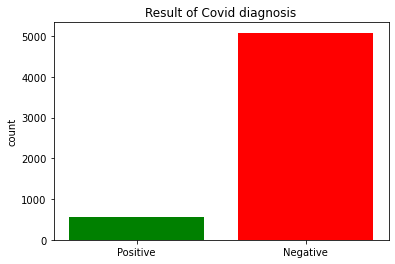

In [9]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.bar(x=['Positive', 'Negative'],
       height=[list(covid.SARS_Cov_2_exam_result).count('positive'),
               list(covid.SARS_Cov_2_exam_result).count('negative')],
       color=['green', 'red'])
ax.set_title('Result of Covid diagnosis')
ax.set_ylabel('count')
print('{:.2f}% positive'.format(list(covid.SARS_Cov_2_exam_result).count('positive')*100/5644))
print('{:.2f}% negative'.format(list(covid.SARS_Cov_2_exam_result).count('negative')*100/5644))

We see a huge <strong>class-disequelibrium</strong>, thus we should not use the Accuracy metric for evaluating our model.

<a id='part2.6'><p style='text-decoration: underline;
          border-top: 1px solid black;
          padding-top: 15px;'>Understanding all the variables :</p></a>

We will focus mainly on features with low percent of missing values.

In [7]:
THRESHOLD = 0.90
DELTA = 0.001

mask = df_missing_data_percent <= THRESHOLD + DELTA
covid_filtered_features = covid[list(df_missing_data_percent[mask].index)].drop(axis=1, columns=['Patient_ID'])
covid_filtered_features.head(n=10)

,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Influenza_B,Respiratory_Syncytial_Virus,Influenza_A,Rhinovirus/Enterovirus,Inf_A_H1N1_2009,...,Mean_corpuscular_volume_(MCV),Eosinophils,Mean_corpuscular_hemoglobin_(MCH),Basophils,Leukocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Lymphocytes,Red_blood_Cells,Monocytes,Mean_platelet_volume_
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,not_detected,not_detected,not_detected,detected,not_detected,...,0.166192,1.482158,-0.292269,-0.223767,-0.09461,-0.950790,0.318366,0.102004,0.357547,0.010677
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,not_detected,not_detected,not_detected,detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,negative,0,1,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,-1.336024,1.018625,0.178175,-0.223767,0.36455,3.331071,-0.005738,-0.850035,0.068652,-1.672222
9,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
covid_filtered_features.describe()

,Patient_age_quantile,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Hemoglobin,Hematocrit,Red_blood_cell_distribution_width_(RDW),Platelets,Mean_corpuscular_volume_(MCV),Eosinophils,Mean_corpuscular_hemoglobin_(MCH),Basophils,Leukocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Lymphocytes,Red_blood_Cells,Monocytes,Mean_platelet_volume_
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,5.990000e+02
mean,9.318391,0.013997,0.008859,0.007264,-1.601319e-08,-2.186214e-09,1.020433e-08,-3.535004e-10,-4.155369e-09,7.206147e-09,-3.453010e-09,-6.633739e-09,6.215833e-09,1.014863e-09,-7.866736e-09,8.424447e-09,-3.220114e-09,7.438142e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000836e+00
min,0.000000,0.000000,0.000000,0.000000,-4.345603e+00,-4.501420e+00,-1.598094e+00,-2.552426e+00,-5.101581e+00,-8.355077e-01,-5.937604e+00,-1.140144e+00,-2.020303e+00,-5.431808e+00,-1.865070e+00,-3.970608e+00,-2.163721e+00,-2.457575e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.862439e-01,-5.188074e-01,-6.250727e-01,-6.053457e-01,-5.148128e-01,-6.669502e-01,-5.013556e-01,-5.292256e-01,-6.372547e-01,-5.524761e-01,-7.307069e-01,-5.679496e-01,-6.141920e-01,-6.624832e-01
50%,9.000000,0.000000,0.000000,0.000000,4.031596e-02,5.340703e-02,-1.827903e-01,-1.217160e-01,6.604462e-02,-3.298351e-01,1.259032e-01,-2.237665e-01,-2.128790e-01,-5.458523e-02,-1.426696e-02,1.385207e-02,-1.151911e-01,-1.015171e-01
75%,14.000000,0.000000,0.000000,0.000000,7.295320e-01,7.171751e-01,3.479481e-01,5.314981e-01,6.268712e-01,3.443949e-01,5.963475e-01,3.871516e-01,4.542955e-01,6.424628e-01,5.976919e-01,6.661759e-01,4.888627e-01,6.838353e-01
max,19.000000,1.000000,1.000000,1.000000,2.671868e+00,2.662704e+00,6.982184e+00,9.532034e+00,3.410980e+00,8.350876e+00,4.098546e+00,1.107822e+01,4.522042e+00,3.331071e+00,3.764100e+00,3.645706e+00,4.533397e+00,3.713052e+00


What means 'Patient_age_quantile' ? It is the features with the higher variability, thus, as we expect, carrying the most part of the information.</br>
'Patient_addmited_to_...' seem to be binaries features, just as laboratory features.

Discrete features (pathogens-related features) :

24


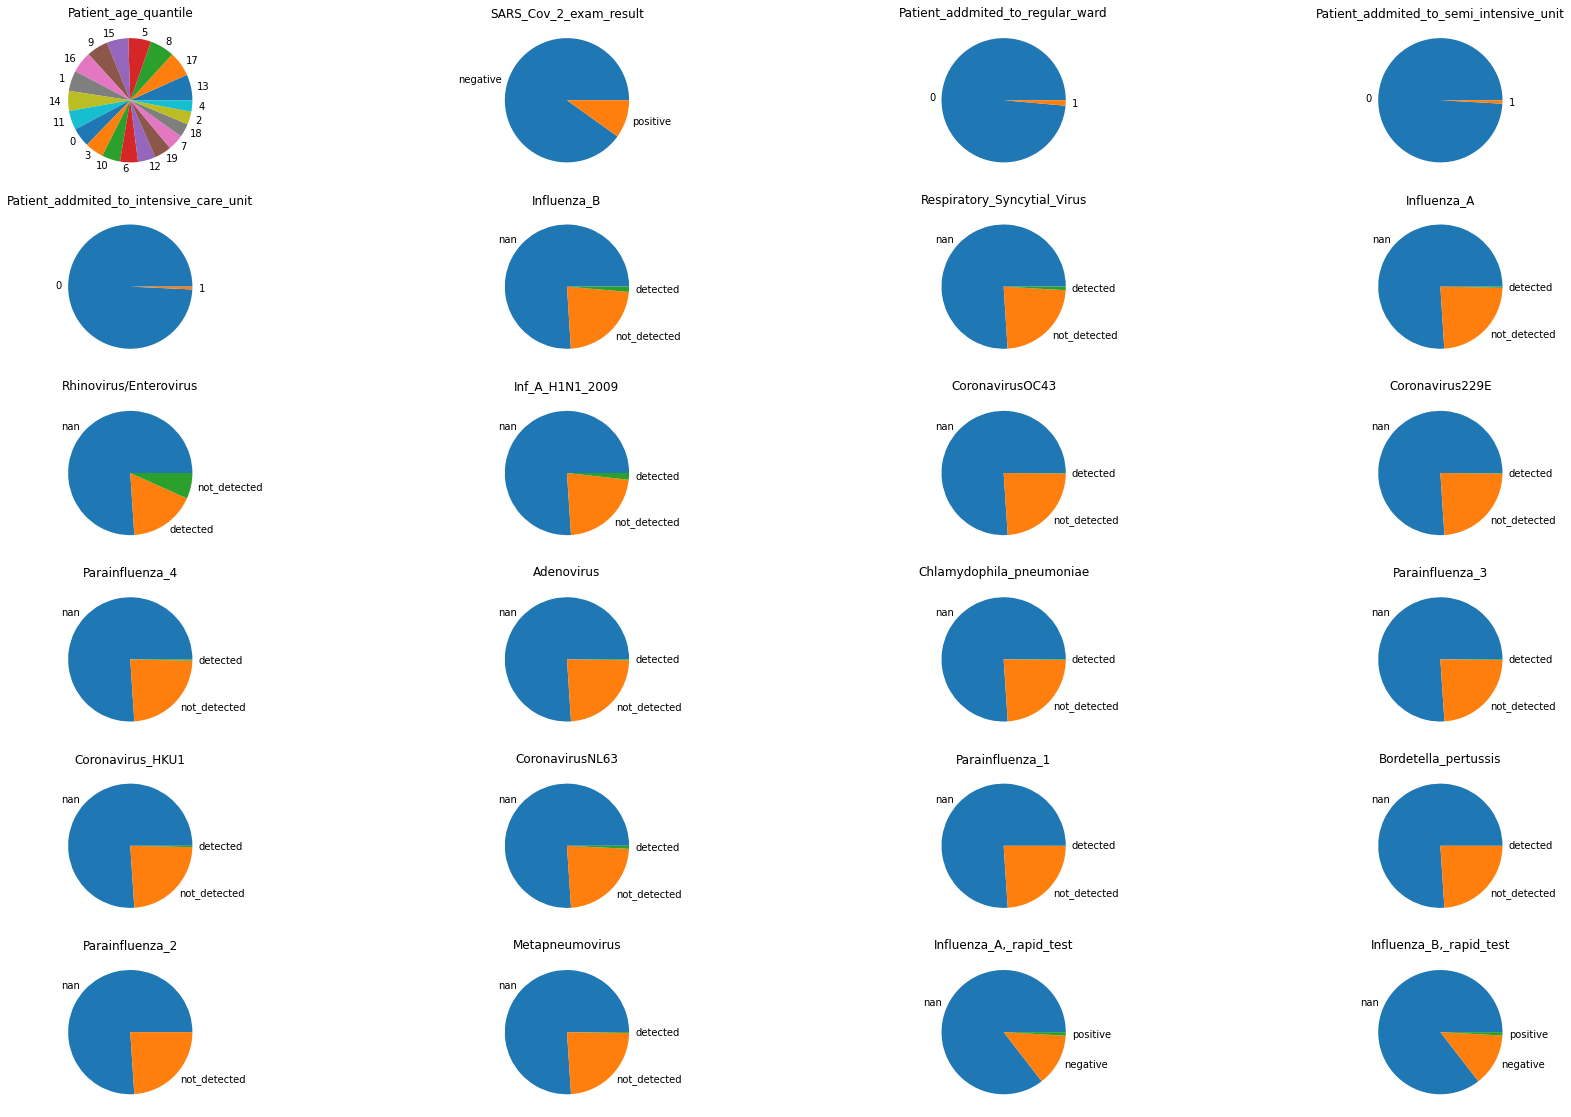

In [12]:
object_col = list(covid_filtered_features.select_dtypes(include=['object', 'int64']).columns)
print(len(object_col))

figure = plt.figure(figsize=(30, 20))
pos = 1

for l in range(1, 7): #6 rows
    for m in range(1, 5): #4 columns
        ax = figure.add_subplot(6, 4, pos)
        ax.pie(x=covid_filtered_features[object_col[pos-1]].value_counts(dropna=False),
               labels=covid_filtered_features[object_col[pos-1]].unique())
        ax.set_title(object_col[pos-1])
        pos += 1

We observe on binary features, a huge class disequelibrium, and an absence of 'detected' in features <strong>'Parainfluenza_2'.</strong></br>
We can see a high proportion of patient 'detected' in the feature <strong>'Rhinovirus/Enterovirus'</strong>

Continuous features (blood features) :

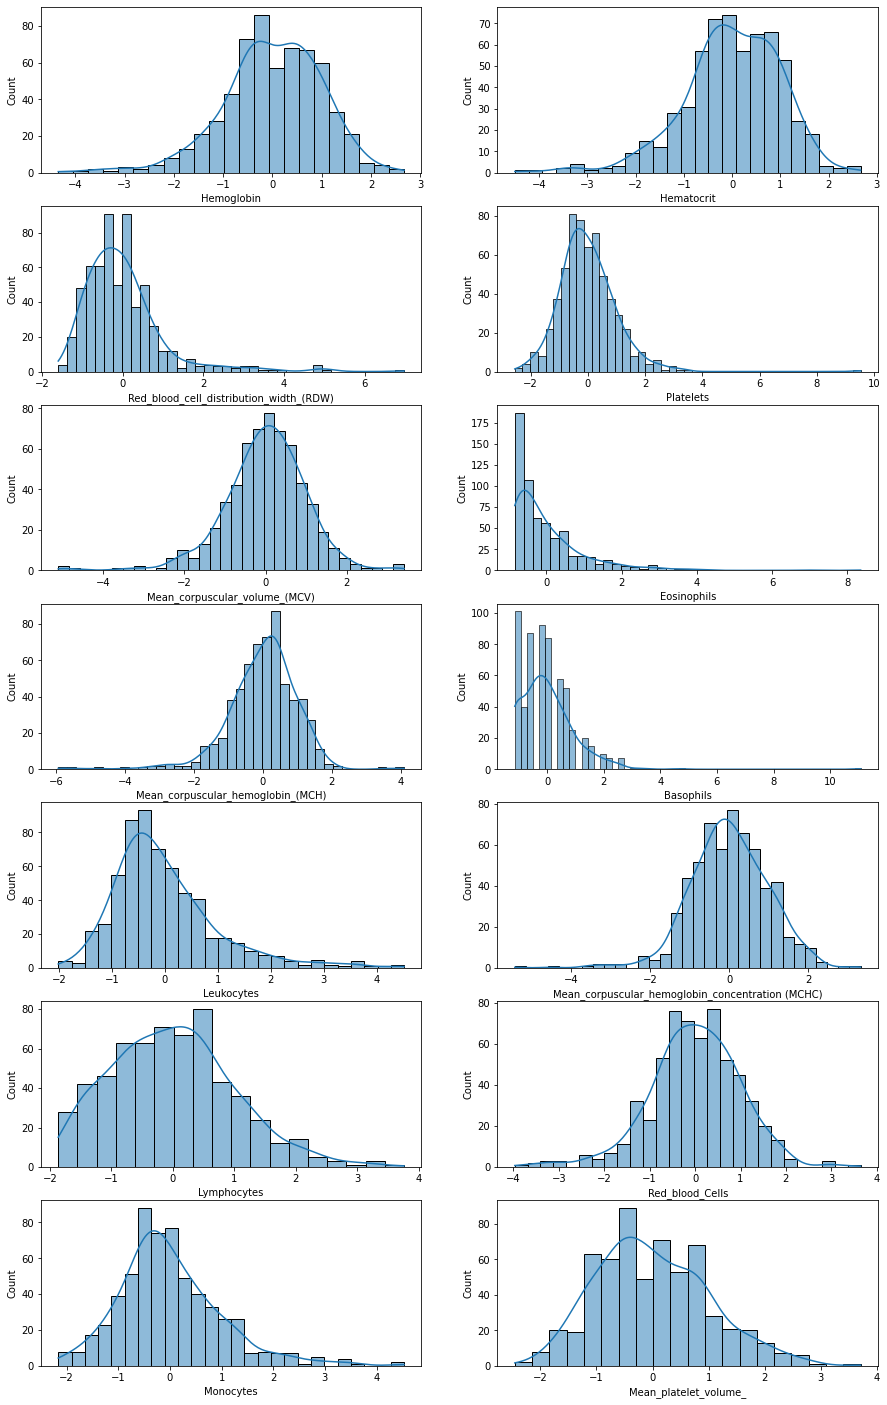

In [13]:
figure = plt.figure(figsize=(15, 25))
pos = 1
float_col = list(covid_filtered_features.select_dtypes('float').columns)

for l in range(1, 8): #7 rows
    for m in range(1, 3): #2 columns
        ax = figure.add_subplot(7, 2, pos)
        sns.histplot(ax=ax, data=covid_filtered_features[float_col[pos-1]], 
                     kde=True, line_kws={'color':'r'})
        pos += 1

We can confirm that data has been already standardized. Moreover most of the features seem to follow a gaussian distribution, but few variables not.

Relationships between continuous features (blood features):

<p style="font-style: italic;">Pearson correlation coefficient :</p>
\begin{equation}
    r = \frac{1}{n-1}\sum_{i=1}^n\frac{xi - \bar{x}}{sx}\cdot\frac{yi - \bar{y}}{sy}
\end{equation}
<ul>
    <li>$-1\leq r \leq 1$</li>
    <li>$r \simeq 0 \rightarrow$ no relationship</li>
    <li>$r \simeq 1 \rightarrow$ positive correlation</li>
    <li>$r \simeq -1 \rightarrow$ negative correaltion</li>
</ul>

Text(0.5, 1.0, 'Heatmap of Pearson correlation coefficient between covid variables')

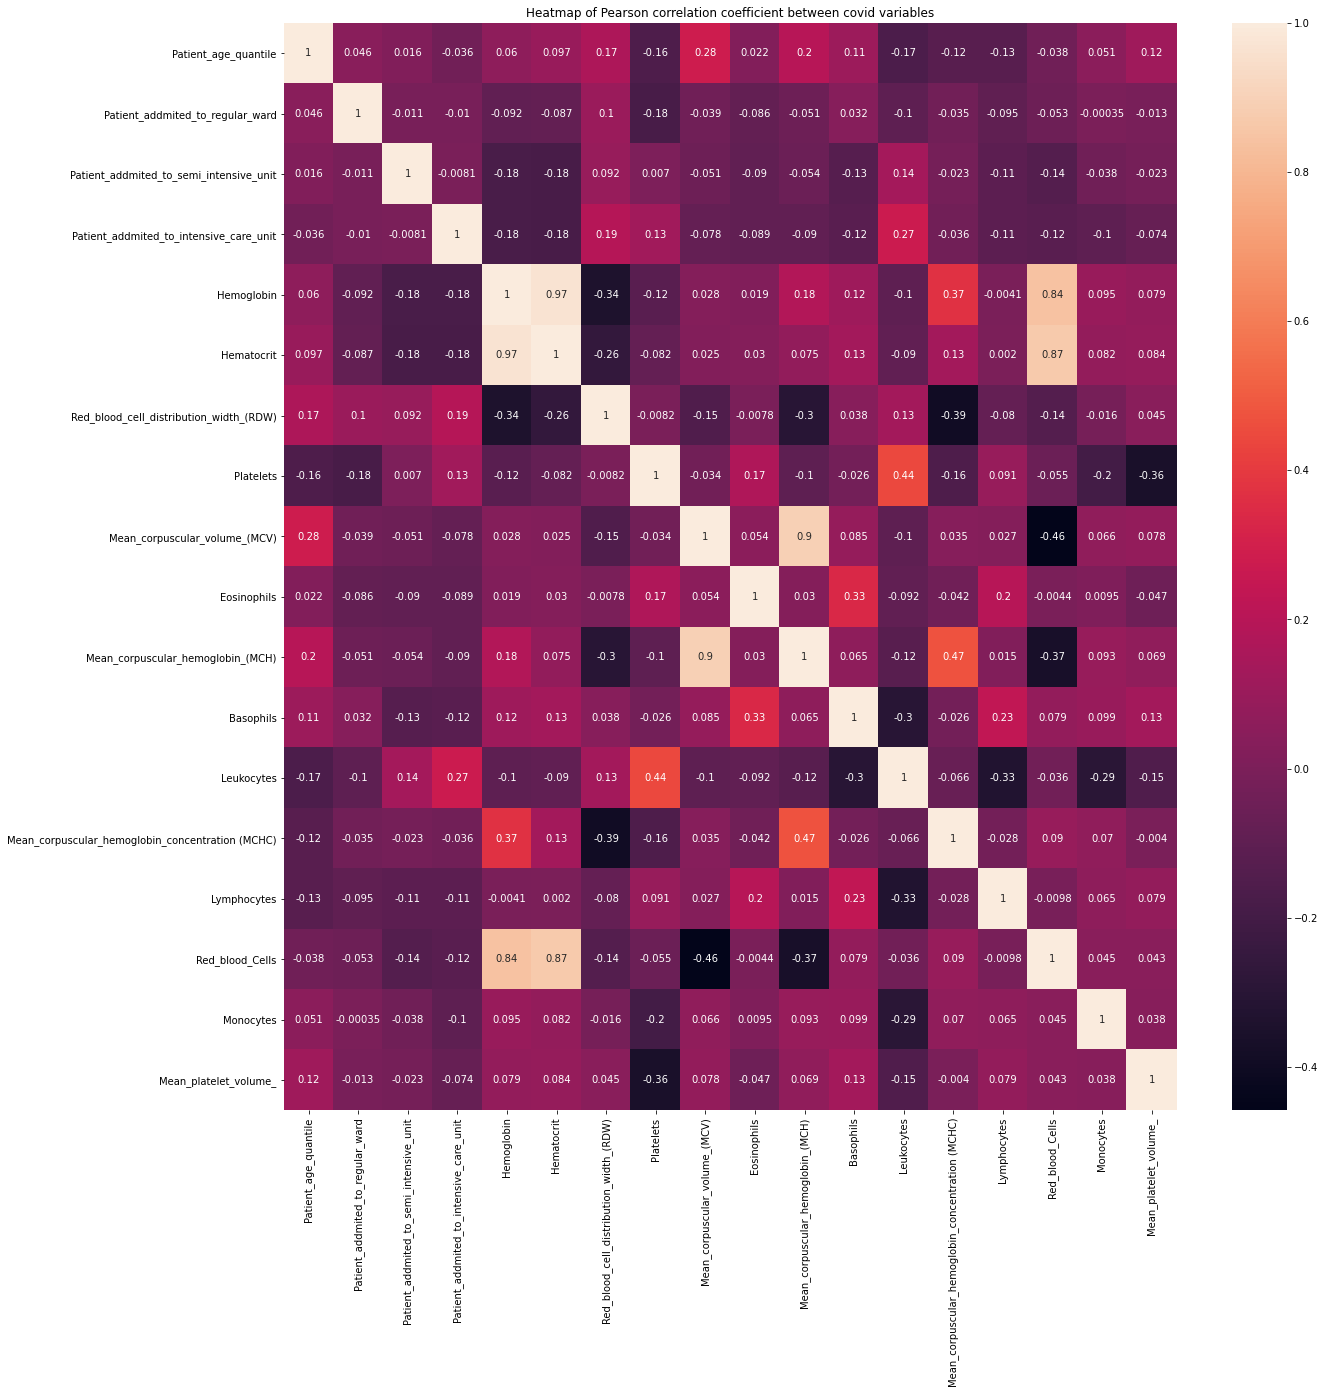

In [29]:
figure = plt.figure(figsize=(20, 20))
ax = figure.add_subplot(1, 1, 1)
#sns.clustermap(data=covid_filtered_features.corr(method='pearson'))
sns.heatmap(ax=ax, data=covid_filtered_features.corr(method='pearson'), annot=True)
ax.set_title('Heatmap of Pearson correlation coefficient between covid variables')

<div style='display: flex;
            flex-direction: row;
            justify-content: space-between'>
    <div style='border-right: 1px black dotted;
                padding: 10px 10px 10px 10px;'>
        <strong>Positive correlation between:</strong>
    <ul>
        <li>Hemoglobin & MCHC</li>
        <li>Platelets & Leucocytes</li>
        <li>Eosinophils & Basophils</li>
        <li>MCH & MCHC</li>
        <li>Red Blood Cells with Hematocrit & Hemoglobin</li>
        <li>Hematocrit & Hemoglobin</li>
        <li>MCH & MCV</li>
    </ul>
    </div>
    <div style='padding: 10px 10px 10px 10px;'>
        <strong>Negative correlation between:</strong>
    <ul>
        <li>Hemoglobin & RDW</li>
        <li>RDW & MCHC</li>
        <li>Platelets & Mean Platelets Volume</li>
        <li>MCV & Red Blood Cells</li>
    </ul>
    </div>
</div>

Test hypothesis :
\begin{equation}
    H0: \rho = 0
    \newline
    H1: \rho \neq 0
\end{equation}

From <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html' traget='_blank'>Scipy documentation</a> : <span style='font-style: italic;'>"The calculation of the p-value relies on the assumption that each dataset is normally distributed."</span> </br>Which is the case (based on our previous graphical asumption) for the features tested below.

In [101]:
#between 'MCV' and 'Red_blood_cells'
## Dataset must not contains any NaN for the test !
numeric_features = list(covid_filtered_features.select_dtypes(include=['int64', 'float64']))
median_dict = {c : np.nanmedian(covid_filtered_features[c]) for c in numeric_features}

##Uncomment one of the following below
covid_test = covid_filtered_features.fillna(median_dict)
#covid_test = covid_filtered_features.dropna()
test = pearsonr(covid_test['Mean_corpuscular_volume_(MCV)'], covid_test['Red_blood_Cells'])
print('Pvalue of {} for the Pearson corr coeff of {:3f} between "Red_blood_Cells" and "MCV" features'.format(test[1], test[0]))

Pvalue of 4.559028226314595e-289 for the Pearson corr coeff of -0.456786 between "Red_blood_Cells" and "MCV" features


In [105]:
#between 'Red_blood_Cells' and 'Hematocrit'
test = pearsonr(covid_test['Hematocrit'], covid_test['Red_blood_Cells'])
print('Pvalue of {} for the Pearson corr coeff of {:3f} between "Red_blood_Cells" and "Hematocrit" features'.format(test[1], test[0]))

Pvalue of 0.0 for the Pearson corr coeff of 0.872058 between "Red_blood_Cells" and "Hematocrit" features


'Red_blood_Cells' feature is significantly positely correlated with 'Hematocrit' feature and significantly negatively correlated with 'MCV' feature.

Relationships between Age feature and blood features :

In [51]:
covid_filtered_features.corr()['Patient_age_quantile'].sort_values()

Leukocytes                                         -0.166386
Platelets                                          -0.158683
Lymphocytes                                        -0.125935
Mean_corpuscular_hemoglobin_concentration (MCHC)   -0.124671
Red_blood_Cells                                    -0.037510
Patient_addmited_to_intensive_care_unit            -0.035772
Patient_addmited_to_semi_intensive_unit             0.015736
Eosinophils                                         0.022085
Patient_addmited_to_regular_ward                    0.046166
Monocytes                                           0.050962
Hemoglobin                                          0.060320
Hematocrit                                          0.096808
Basophils                                           0.107525
Mean_platelet_volume_                               0.119449
Red_blood_cell_distribution_width_(RDW)             0.166429
Mean_corpuscular_hemoglobin_(MCH)                   0.197394
Mean_corpuscular_volume_

Min = -0.17 and Max = 0.28. So the correlation with the Age features are very small, not sufficient to conclude something.

<a id='part2.7'><p style='text-decoration: underline;
          border-top: 1px solid black;
          padding-top: 15px;'>Relationships between features and the target</p></a>

In [85]:
#sns.pairplot(covid_filtered_features.select_dtypes(include=['int64', 'float64']).drop(axis=1, columns=['Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Patient_age_quantile']))

<strong>A good habits is to compare features with the different modalities of the target.</strong> Thus we divise the covid dataset into two parts: positive to Covid19 and negative to Covid19.

In [14]:
negative = covid_filtered_features[covid_filtered_features['SARS_Cov_2_exam_result'] == 'negative']
positive = covid_filtered_features[covid_filtered_features['SARS_Cov_2_exam_result'] == 'positive']
print(len(negative))
print(len(positive))
positive.head(n=5)

5086
558


,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Influenza_B,Respiratory_Syncytial_Virus,Influenza_A,Rhinovirus/Enterovirus,Inf_A_H1N1_2009,...,Mean_corpuscular_volume_(MCV),Eosinophils,Mean_corpuscular_hemoglobin_(MCH),Basophils,Leukocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Lymphocytes,Red_blood_Cells,Monocytes,Mean_platelet_volume_
67,7,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,16,positive,1,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,10,positive,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,2,positive,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,...,-1.396114,-0.498393,-1.442245,1.303529,-0.420197,-0.452899,-0.048383,1.653476,1.933339,1.469188
676,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have seen previously that features can be divided into two groups: Blood-related features (with a percent of missing data inside 88% and 90%) and Pathogen-related features (with a percent of missing data around 76%). <strong>This is a good habits to try dividing our dataset into multiple parts, based on our exploration results.</strong>

For Blood-related features :

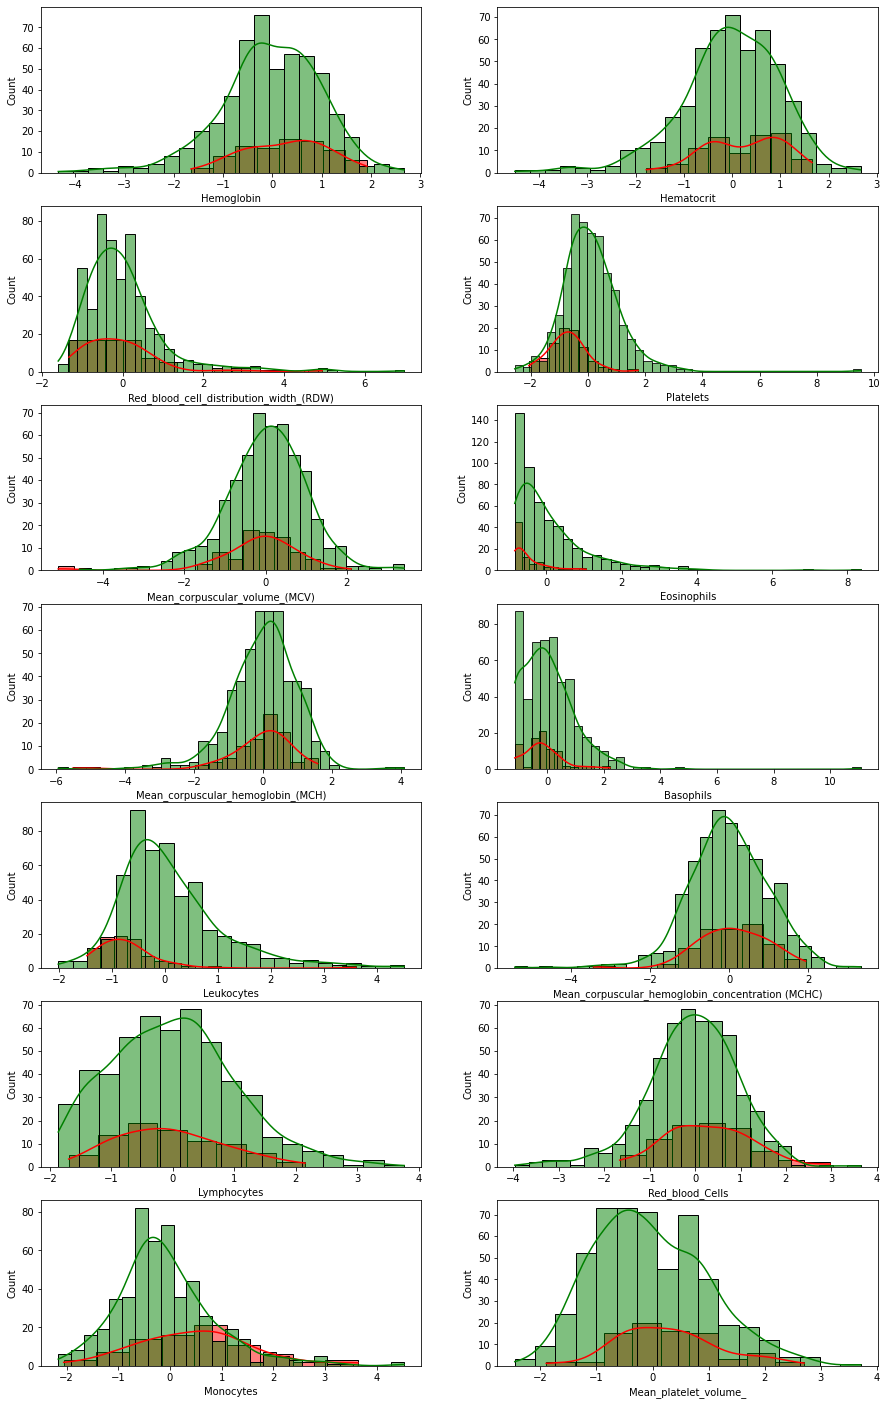

In [15]:
figure = plt.figure(figsize=(15, 25))
pos = 1
float_col = list(covid_filtered_features.select_dtypes('float').columns)

for l in range(1, 8): #7 rows
    for m in range(1, 3): #2 columns
        ax = figure.add_subplot(7, 2, pos)
        sns.histplot(ax=ax, data=positive[float_col[pos-1]], kde=True, color='r')
        sns.histplot(ax=ax, data=negative[float_col[pos-1]], kde=True, color='g')
        pos += 1

We can observe that it seems that a patient have less Platelets and Leukocytes when he is positive for the Covid19. In order to confirm these tendancies, we should compute a statistical test.

Age feature :

Covid19 positive median: 11.0
Covid19 negative median: 9.0


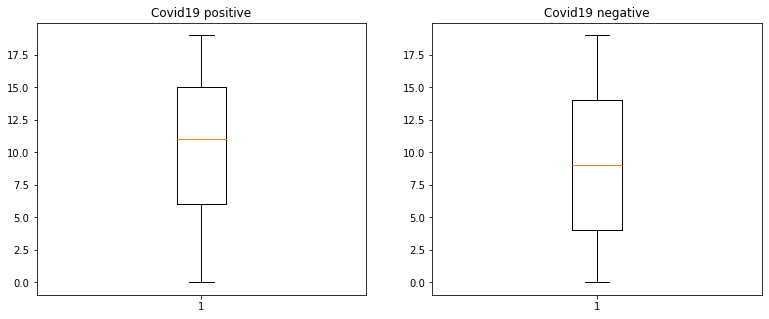

In [16]:
figure = plt.figure(figsize=(13, 5))
ax_pos = figure.add_subplot(1, 2, 1)
ax_neg = figure.add_subplot(1, 2, 2)
ax_pos.boxplot(positive.Patient_age_quantile)
ax_neg.boxplot(negative.Patient_age_quantile)
ax_pos.set_title('Covid19 positive')
ax_neg.set_title('Covid19 negative')
print("Covid19 positive median: {}".format(positive['Patient_age_quantile'].median()))
print("Covid19 negative median: {}".format(negative['Patient_age_quantile'].median()))

We observe a different median, we should confirm this observation with a statistical test.

Pathogen-related features :

22


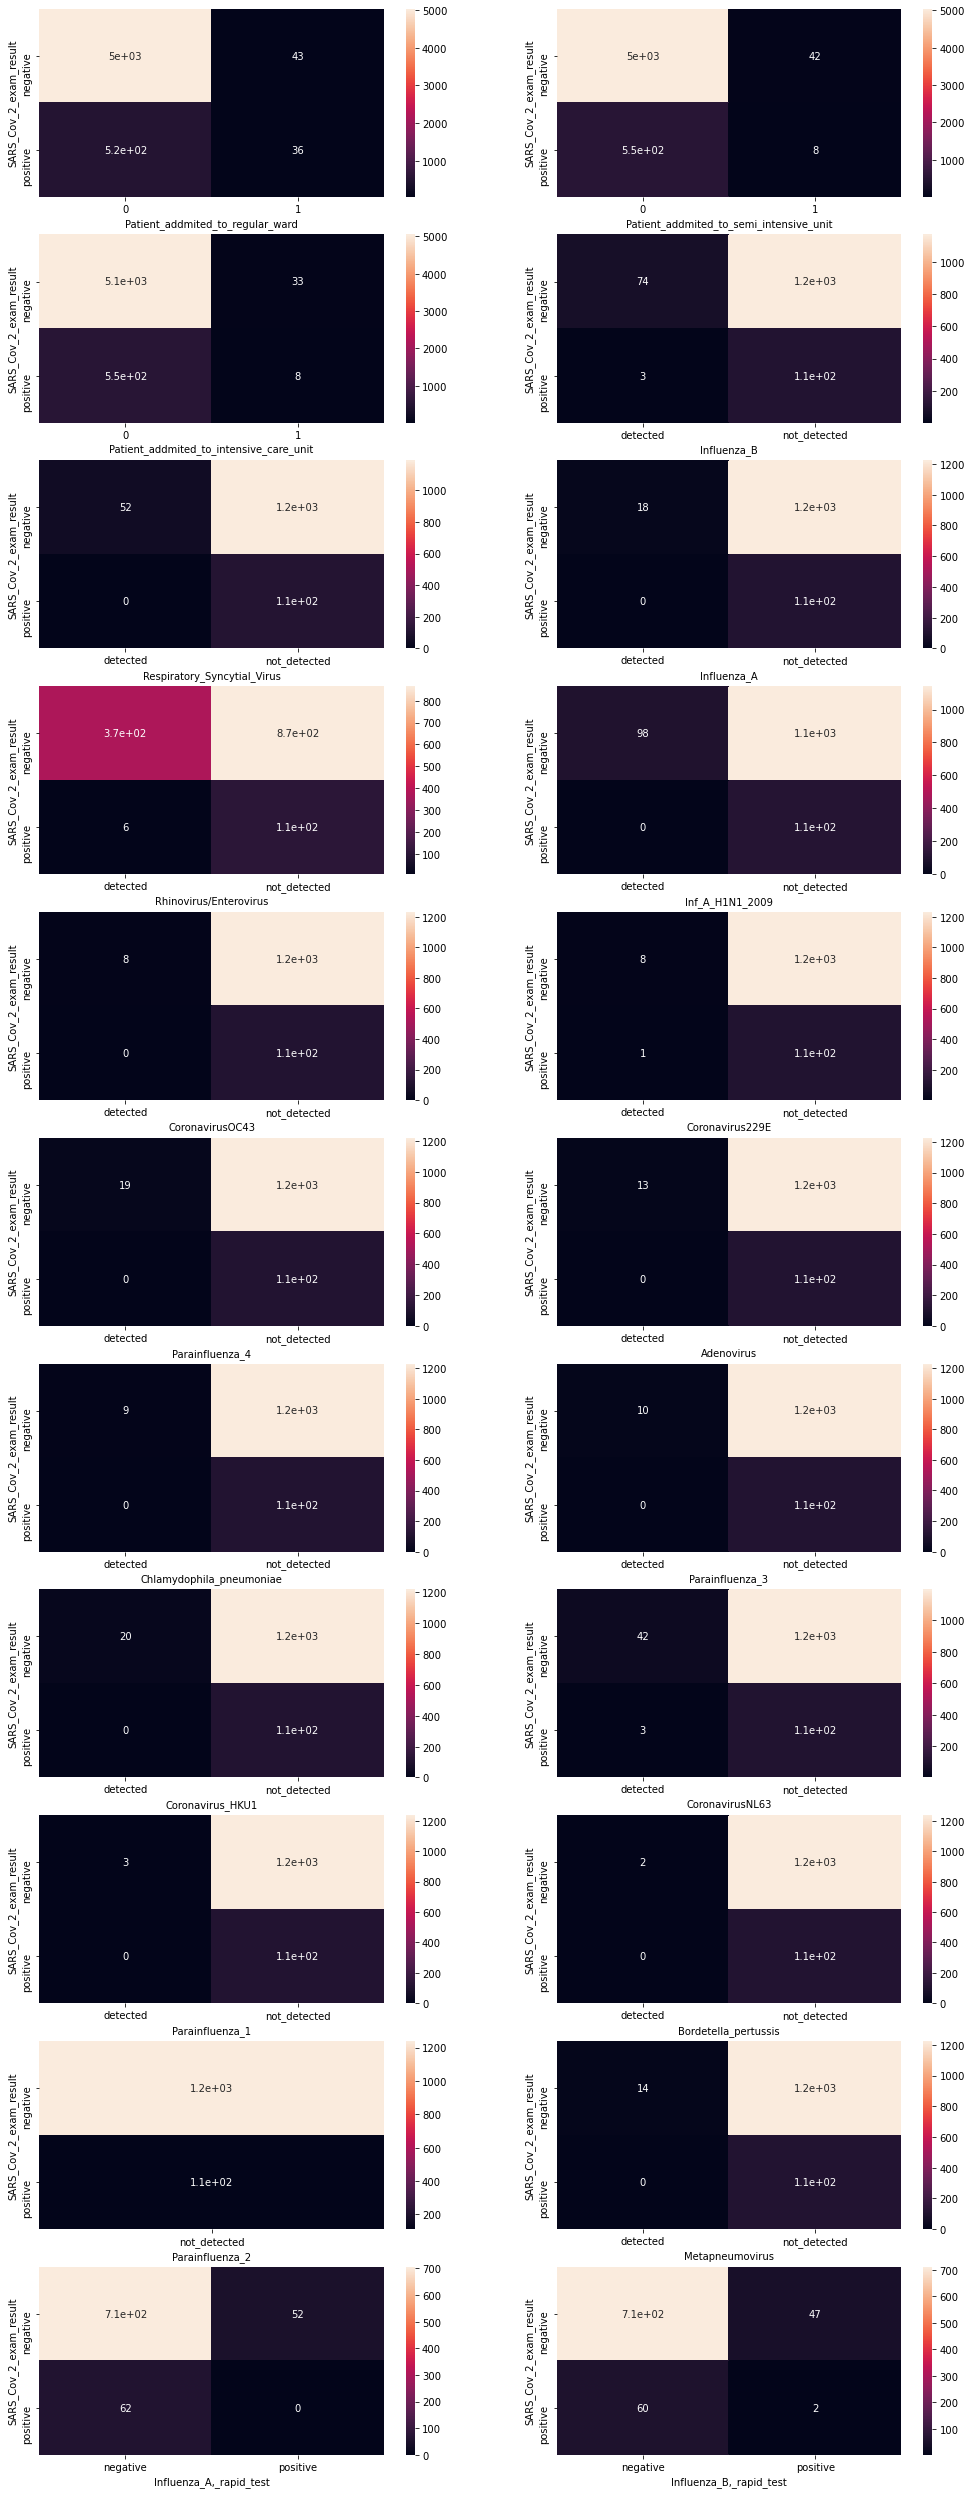

In [26]:
object_col = list(covid_filtered_features.select_dtypes(include=['int64', 'object']).columns)
object_col.remove('SARS_Cov_2_exam_result')
object_col.remove('Patient_age_quantile')
print(len(object_col))

figure = plt.figure(figsize=(17, 45))
pos = 1
for col in object_col:
    ax = figure.add_subplot(11, 2, pos)
    sns.heatmap(ax=ax, data=pd.crosstab(covid_filtered_features['SARS_Cov_2_exam_result'],
                                        covid_filtered_features[col]), annot=True)
    pos += 1

We see few observation both positive for SARS-Cov2 and for other virusn except for <strong>Rhinovirus/Enterovirus</strong>.

<h3>3) Preprocessing</h3>